In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import export_text
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv('churnnotclean.csv')
data.drop('ID', axis=1, inplace=True)
data.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014/6/17,iPhone,2014/1/25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014/5/5,Android,2014/1/29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014/7/1,iPhone,2014/6/1,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014/6/29,iPhone,2014/10/1,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014/3/15,Android,2014/1/27,11.8,14,False,82.4,1


In [20]:
from sklearn.preprocessing import LabelEncoder

data['last_trip_date'] = pd.to_datetime(data['last_trip_date'], format='mixed', errors='coerce')
data['signup_date'] = pd.to_datetime(data['signup_date'], format='mixed', errors='coerce')
data.fillna(method='ffill', inplace=True)
categorical_features = ['category_column1', 'category_column2']
numerical_features = ['numerical_column1', 'numerical_column2']
label_encoder = LabelEncoder()
data['city'] = label_encoder.fit_transform(data['city'])
data['phone'] = label_encoder.fit_transform(data['phone'])
data.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)
data.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,1,1,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,0,0,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,0,1,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,1,1,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,2,0,11.8,14,False,82.4,1


## Train and Test set split

In [ ]:
print(data.shape)
label = ['churn']
print(data[label].value_counts(normalize=True))
classlabel = ["No","Yes"] # for tree-plot labeling

(50000, 11)
churn
1        0.53538
0        0.46462
Name: proportion, dtype: float64


In [ ]:
Y = data[label]                
X = data.drop(label, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify = Y, random_state=42)   
print(X_train.shape, X_test.shape)
print('Train:', y_train.value_counts(normalize=True))
print('Test :', y_test.value_counts(normalize=True))

(35000, 10) (15000, 10)
Train: churn
1        0.535371
0        0.464629
Name: proportion, dtype: float64
Test : churn
1        0.5354
0        0.4646
Name: proportion, dtype: float64


## Define some helper functions

In [ ]:
## To display the Decision Tree plot with Depth and leaves information
def plottree(dtree, wdt, hgt):
    plt.figure(figsize=(wdt, hgt)) # Width, height in inches
    tree.plot_tree(dtree,filled=True,fontsize=8,rounded=True,feature_names=list(X),class_names=classlabel)
    print("Tree Depth:", dtree.get_depth(),"\n","No. leaves:", dtree.get_n_leaves())
    plt.show()

## To Print the feature importance in sorted order
def featureImpt(dtree, num):
    feature_importance = dtree.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df.head(num)
    #print(feature_importance_df.head(num))

## 1. Decision Tree Modeling

Score on Trainset: 0.664
Score on Testset:  0.662
Tree Depth: 4 
 No. leaves: 16


<Figure size 1500x1000 with 0 Axes>

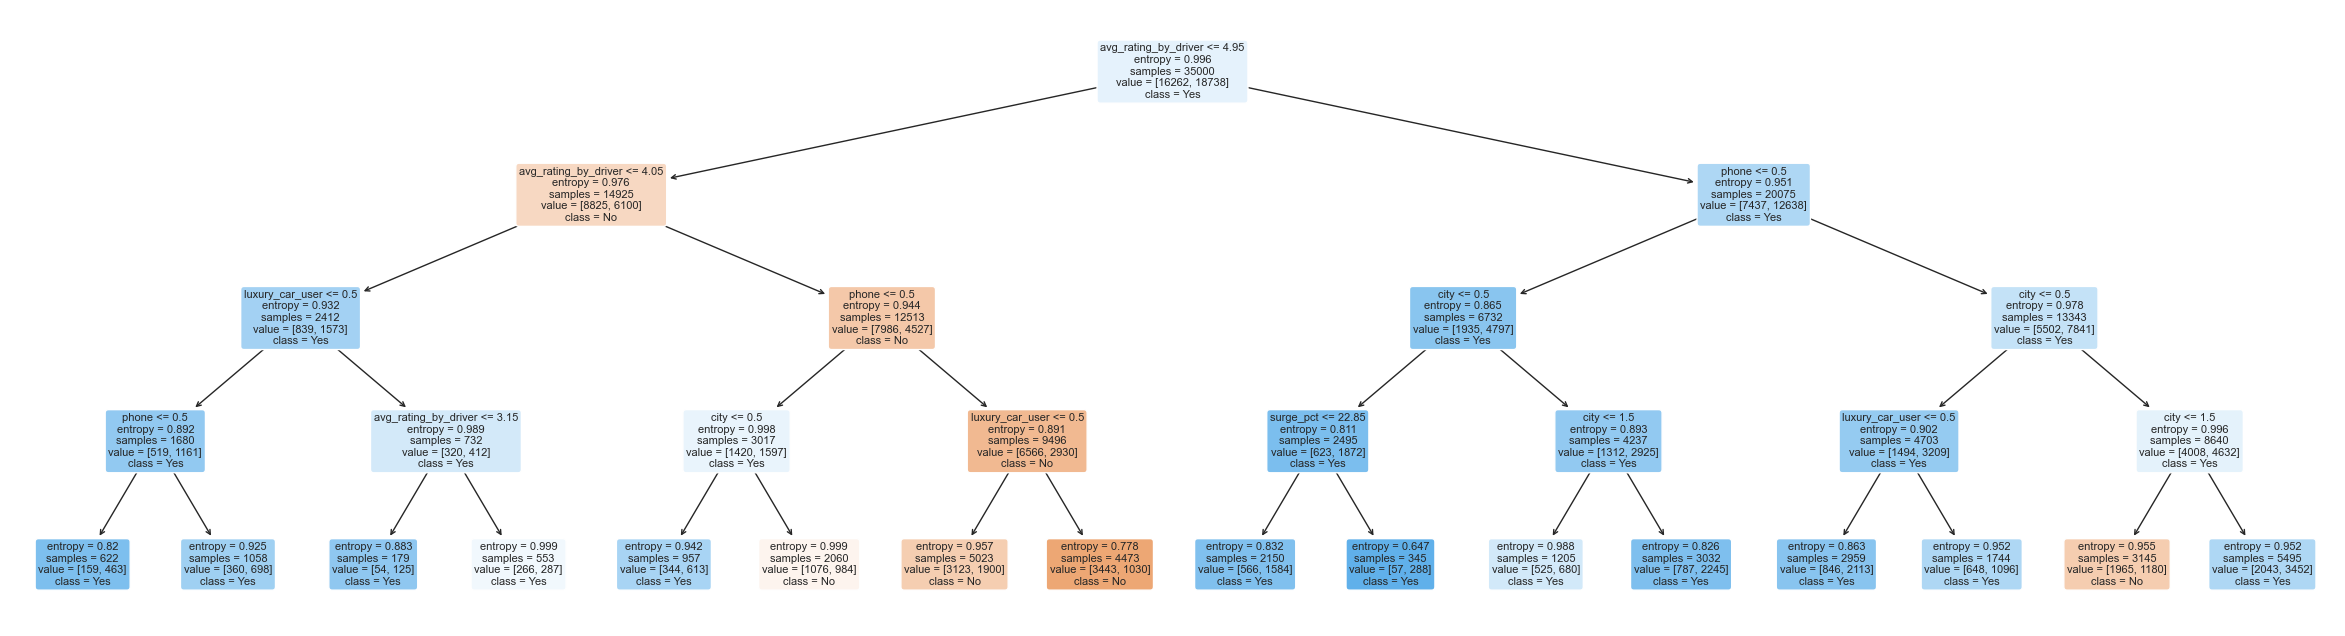

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 决策树模型
tree = DecisionTreeClassifier(random_state=42,
                            criterion='entropy',
                            max_depth=4,
                            min_samples_leaf=5,
                            min_samples_split=5)
tree.fit(X_train, y_train)

# 输出训练集和测试集的准确率
print("Score on Trainset:", round(accuracy_score(y_train, tree.predict(X_train)), 3)) 
print("Score on Testset: ", round(accuracy_score(y_test, tree.predict(X_test)), 3))

# 修改后的 plottree 函数
def plottree(dtree, wdt, hgt):
    plt.figure(figsize=(wdt, hgt)) # 设置图的宽度和高度
    plot_tree(dtree, filled=True, fontsize=8, rounded=True, feature_names=list(X.columns), class_names=classlabel)
    print("Tree Depth:", dtree.get_depth(), "\n", "No. leaves:", dtree.get_n_leaves())
    plt.show()

# 输出决策树
plt.figure(figsize=(15,10))  # 设置图片尺寸
plottree(tree, 30, 8)

# 修改后的 featureImpt 函数
def featureImpt(dtree, num):
    feature_importance = dtree.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df.head(num))  # 输出前 num 个重要特征
    return feature_importance_df.head(num)

# 输出特征重要性
featureImpt(tree, 5)


In [ ]:
#上图参数调太小了

In [ ]:
#更优的参数组合，从而提升模型的表现。接下来，将使用 GridSearchCV 进行超参数的网格搜索，并调节一些可能对模型影响较大的参数，比如树的深度、分裂标准、最小分裂样本数、最小叶子节点样本数等。

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 定义参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],   # 划分标准：基尼系数和信息熵
    'max_depth': [4, 6, 8, 10, 12],     # 树的最大深度
    'min_samples_split': [2, 5, 10, 20],# 内部节点再划分所需最小样本数
    'min_samples_leaf': [1, 2, 5, 10],  # 叶子节点最少样本数
    'max_features': [None, 'sqrt', 'log2']  # 最大使用的特征数量
}

# 实例化决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 实例化网格搜索
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # 使用准确率作为评分标准
    cv=5,                # 5折交叉验证
    verbose=1,
    n_jobs=-1            # 使用所有可用核心
)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters: \n", grid_search.best_params_)
print("Best Estimator:\n", grid_search.best_estimator_) # 最佳模型

# 输出交叉验证得分
print("Best CV Accuracy:", round(grid_search.best_score_, 3))

# 在测试集上评估
best_dt_model = grid_search.best_estimator_
dt_score = round(accuracy_score(y_test, best_dt_model.predict(X_test)), 3)
print("Score on Testset:", dt_score)

# 输出决策树
plottree(best_dt_model, 15, 5)

In [ ]:
#accuracy如果都是0.7上下就没问题
#集成模型：如果你对模型性能有更高要求，可以尝试集成学习模型（例如，随机森林或梯度提升树）来获得更好的泛化性能。

## 2. RandomForest Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Using all default values
rftree1 = RandomForestClassifier(random_state=42, oob_score=True)        
rftree1.fit(X_train, y_train)  
print("OOB Score: ", round(rftree1.oob_score_,3))#四舍五入三位小数
print("Score on Testset:", round(rftree1.score(X_test, y_test),3)) #predict on test

#accuracy of prediction

In [ ]:
fimpt = pd.DataFrame({"Features": X_train.columns, "Importance":rftree1.feature_importances_})
fimpt.sort_values("Importance", ascending=False, inplace=True)
fimpt.head(5)

In [ ]:
# Define some parameters
params = {
    'n_estimators': 100,
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'bootstrap': True,
    'oob_score': True,
    'random_state': 42}

rftree1 = RandomForestClassifier(**params)
rftree1.fit(X_train, y_train)

print("OOB Score: ", round(rftree1.oob_score_,3))
print("Score on Testset:", round(rftree1.score(X_test, y_test),3)) #predict on test

In [ ]:
fimpt = pd.DataFrame({"Features": X_train.columns, "Importance":rftree1.feature_importances_})
fimpt.sort_values("Importance", ascending=False, inplace=True)
fimpt.head(5)
# sum(fimpt['Importance']) # adds up to 1.0

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, oob_score=True), 
                           param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Access the best model
best_model = grid_search.best_estimator_

# Print the OOB Score of the best model
if hasattr(best_model, 'oob_score_'):
    print("Best OOB Score: ", round(best_model.oob_score_, 3))
else:
    print("OOB score not available for the best model.")

# Print the test set score
print("Score on Testset:", round(best_model.score(X_test, y_test), 3))

## 3. XGBoost Modeling

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators = 100, 
          objective = 'binary:logistic',
          learning_rate = 0.01, # smaller = more robust
          gamma = 0.4, # larger regularization avoids over-fitting 
                       # controls the complexity of the tree
          subsample = 0.4, #fraction of obs to random sample
          colsample_bytree = 0.5, # fraction [0.5-1] of features used for each tree-lower to avoid overfitting
          max_depth = 3,
          random_state = 42)

xgbc.fit(X_train, y_train)
print("Score on Trainset:", round(xgbc.score(X_train, y_train),3))
print("Score on Testset :", round(xgbc.score(X_test, y_test),3))

In [ ]:
# Fine tune your model using RandomizedSearchCV and/or GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of different combinations to try
                                   scoring='accuracy',  # Use 'f1', 'roc_auc', etc. based on your problem
                                   cv=3,  # 3-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores
random_search.fit(X_train, y_train)
# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best score
print("Best Score:", random_search.best_score_)

# Use the best estimator to make predictions
best_model = random_search.best_estimator_
test_score_XG = best_model.score(X_test, y_test)
print("Test Set Score (Accuracy):", test_score_XG)